In [16]:
# Imports
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as image
import easygui
# Loading the image
Original = cv2.imread('poor_quality_text.jpg')

I = Original.copy()
# Histogram Equalization

# First, convert to YUV
YUV = cv2.cvtColor(I, cv2.COLOR_BGR2YUV)

# Extracting the luminance
Y = YUV[:,:,0]

# create a CLAHE object (Arguments are optional). Contrast Limited Adaptive Histogram Equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(10,10))
cl1 = clahe.apply(Y)

B = cv2.adaptiveThreshold(cl1, maxValue=255,
                              adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              thresholdType = cv2.THRESH_BINARY,
                              blockSize = 21, # prev: 21
                              C = 20  #21
                             )

shape = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1,1))
# MORPH_OPEN is chosen, which is an erosion followed by a dilation. Allows the program to remove small blobs
# from an image via erosion, then a dilation is applied to regrow the signature to its original size

# cv2.morphologyEx function 
# where morph is the output image,
# B is the source,
# cv2.MORPH_OPEN is the morphological operation to be applied,
# shape is the kernel, the structuring element which will be convolved with the image (applying a kernel over each pixel
# and its local neighbours across the entire image)
# and iterations is the number of iterations, the number of times morphological operation is performed.
morph = cv2.morphologyEx(B, cv2.MORPH_OPEN, shape, iterations=1)

# Step 4: Croppping the iamge
    
# Cropping algorithm

# First, gather the points of the signature (where the pixels are black)
points = np.argwhere(morph==0)

# find the min(first occurance of signature pixel)
y1, x1 = points.min(axis=0)

# find the max (last occurance of signature pixel)
y2, x2 = points.max(axis=0)

# Outputs the cropped image based on the points found,leaving only the signature.
cropped = morph[y1:y2, x1:x2]
    
# Converting the image back to the BGR colourspace
pre_sharpened = cv2.cvtColor(cropped, cv2.COLOR_GRAY2BGR)

# Image sharpening
sharpen_filter=np.array([[0,-1,0],
                 [-1,5,-1],
                [0,-1,0]])

final = cv2.filter2D(pre_sharpened, ddepth=-1, kernel=sharpen_filter)

In [17]:
# Original
cv2.imshow('window', Original)
key = cv2.waitKey(0)

cv2.destroyAllWindows()
# Unix systems require another call to cv2.waitKey after cv2.destoyAllWindows() to avoid a bug where the 
# window doesn't close. The 1ms timeout causes this to exit almost immediately so the user doesn't notice it
cv2.waitKey(1)

-1

In [18]:
# Final
cv2.imshow('window', final)
key = cv2.waitKey(0)

cv2.destroyAllWindows()
# Unix systems require another call to cv2.waitKey after cv2.destoyAllWindows() to avoid a bug where the 
# window doesn't close. The 1ms timeout causes this to exit almost immediately so the user doesn't notice it
cv2.waitKey(1)

-1

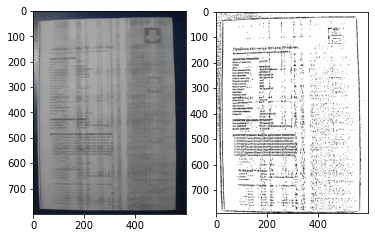

In [19]:
# Side by side
fig, axs = plt.subplots(1, 2)

axs[0].imshow(Original)
axs[1].imshow(final)

In [9]:
# Writing the image
filename = 'improvedImage.jpg'
cv2.imwrite(filename, final)

True